In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
data = {
    'Sample ID': [1, 2, 3],
    'Accelerometer_X': [0.25, -0.12, 0.45],
    'Accelerometer_Y': [0.98, 0.76, -0.23],
    'Accelerometer_Z': [-0.12, 0.35, 0.80],
    'Gyroscope_X': [0.02, 0.01, -0.01],
    'Gyroscope_Y': [-0.03, 0.06, -0.02],
    'Gyroscope_Z': [0.05, -0.04, 0.03],
    'Activity Label': ['Walking', 'Jogging', 'Sitting']
}

df = pd.DataFrame(data)


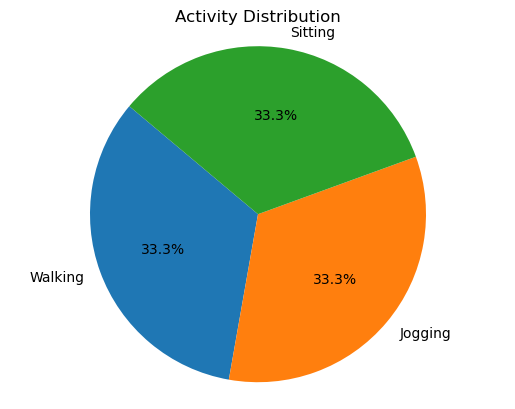

In [4]:
activity_counts = df['Activity Label'].value_counts()
plt.pie(activity_counts, labels=activity_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Activity Distribution')
plt.show()


Conversational AI

In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances_argmin_min
from fuzzywuzzy import fuzz

# Load the dataset into a pandas DataFrame
data = {
    'Sample ID': [1, 2, 3],
    'Accelerometer_X': [0.25, -0.12, 0.45],
    'Accelerometer_Y': [0.98, 0.76, -0.23],
    'Accelerometer_Z': [-0.12, 0.35, 0.80],
    'Gyroscope_X': [0.02, 0.01, -0.01],
    'Gyroscope_Y': [-0.03, 0.06, -0.02],
    'Gyroscope_Z': [0.05, -0.04, 0.03],
    'Activity Label': ['Walking', 'Jogging', 'Sitting']
}

df = pd.DataFrame(data)

# Preprocess the data
features = df.drop(['Sample ID', 'Activity Label'], axis=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply Principal Component Analysis (PCA) for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
df['PCA_1'] = pca_result[:, 0]
df['PCA_2'] = pca_result[:, 1]

# Define functions for user interactions

def get_activity_pca(x_pca, y_pca):
    closest_index, _ = pairwise_distances_argmin_min(pca_result, [[x_pca, y_pca]])
    activity = df.loc[closest_index[0], 'Activity Label']
    return activity

def get_similar_activities(user_activity):
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['Activity Label'])
    similarity_matrix = cosine_similarity(tfidf_matrix)
    user_index = df[df['Activity Label'] == user_activity].index[0]
    similar_activities = sorted(
        list(enumerate(similarity_matrix[user_index])),
        key=lambda x: x[1],
        reverse=True
    )
    similar_activity_names = [df.iloc[idx, :]['Activity Label'] for idx, _ in similar_activities[1:]]
    return similar_activity_names

# Conversation loop
print("Hello! I'm your Human Sensor Signals Assistant. How can I assist you today?")

while True:
    user_input = input("User: ")
    
    if user_input.lower() in ['exit', 'quit', 'bye']:
        print("Goodbye!")
        break
    
    # Check if the user's input matches an activity label
    match_ratio = [(label, fuzz.partial_ratio(label.lower(), user_input.lower())) for label in df['Activity Label']]
    best_match = max(match_ratio, key=lambda x: x[1])
    
    if best_match[1] > 80:  # If there's a close match to an activity label
        activity = best_match[0]
        print(f"Detected activity: {activity}")
        print(f"Corresponding PCA coordinates: ({df.loc[df['Activity Label'] == activity, 'PCA_1'].values[0]}, {df.loc[df['Activity Label'] == activity, 'PCA_2'].values[0]})")
        similar_activities = get_similar_activities(activity)
        print(f"Similar activities: {', '.join(similar_activities)}")
        
    else:
        print("I'm sorry, I couldn't understand the activity. Please try again or type 'exit' to end the conversation.")


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Hello! I'm your Human Sensor Signals Assistant. How can I assist you today?


User:  jogging


Detected activity: Jogging
Corresponding PCA coordinates: (-1.8380522953318823, -1.606839175433352)
Similar activities: Walking, Sitting


User:  sitting


Detected activity: Sitting
Corresponding PCA coordinates: (2.5734326378980756, -0.5354840245781719)
Similar activities: Walking, Jogging


User:  walking


Detected activity: Walking
Corresponding PCA coordinates: (-0.7353803425661941, 2.142323200011523)
Similar activities: Jogging, Sitting
